In [ ]:
#this notebook will be mainly used for the capstone project

In [47]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [48]:
#Finding the geo data for Hoboken
#Let's find the geographic data for Hoboken so we can pull it from FourSquare.
address = 'London, England'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [49]:
#FourSquare

#Define Foursquare Credentials and Version
CLIENT_ID = 'JWVPJRFCFRLDUUIAN1S4I3JD0NHU0PIUA33YPHWW2LNNKHP0' # your Foursquare ID
CLIENT_SECRET = 'XGGRBITZKCRGUVJ2TJOWBV0IMBDWNXOQ1HXFTFDI43XDIIQO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version 20180605

print('Your credentails:')
print('JWVPJRFCFRLDUUIAN1S4I3JD0NHU0PIUA33YPHWW2LNNKHP0: ' + CLIENT_ID)
print('XGGRBITZKCRGUVJ2TJOWBV0IMBDWNXOQ1HXFTFDI43XDIIQO:' + CLIENT_SECRET)

Your credentails:
JWVPJRFCFRLDUUIAN1S4I3JD0NHU0PIUA33YPHWW2LNNKHP0: JWVPJRFCFRLDUUIAN1S4I3JD0NHU0PIUA33YPHWW2LNNKHP0
XGGRBITZKCRGUVJ2TJOWBV0IMBDWNXOQ1HXFTFDI43XDIIQO:XGGRBITZKCRGUVJ2TJOWBV0IMBDWNXOQ1HXFTFDI43XDIIQO


In [119]:
#Creating a URL for all of the venues in London
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=JWVPJRFCFRLDUUIAN1S4I3JD0NHU0PIUA33YPHWW2LNNKHP0&client_secret=XGGRBITZKCRGUVJ2TJOWBV0IMBDWNXOQ1HXFTFDI43XDIIQO&v=20180605&ll=51.5073219,-0.1276474&radius=10000&limit=300'

In [120]:
#Pulling the JSON for the URL of venues.
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea44eb90be7b4001ba1d54e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'London',
  'headerFullLocation': 'London',
  'headerLocationGranularity': 'city',
  'totalResults': 240,
  'suggestedBounds': {'ne': {'lat': 51.59732199000009,
    'lng': 0.016680908642864423},
   'sw': {'lat': 51.41732180999991, 'lng': -0.2719757086428644}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518cdf964a520e6a520e3',
       'name': 'National Gallery',
       'location': {'address': 'Trafalgar Sq',
        'lat': 51.50887601013219,
        'lng': -0.1284778118133545,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.50887601013219,
      

In [121]:
#Now we start pulling the data from Foursquare into a dataframe so we can manipulate and use it.
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,National Gallery,4ac518cdf964a520e6a520e3,Art Museum,51.508876,-0.128478
1,Trafalgar Square,4ac518cef964a520f9a520e3,Plaza,51.507987,-0.128048
2,East Trafalgar Square Fountain,50aa7c98e4b0d042f9f0bd59,Fountain,51.508088,-0.127700
3,Gordon's Wine Bar,4acdb591f964a520c7cc20e3,Wine Bar,51.507911,-0.123293
4,Whitehall Gardens,4c0ce9597189c928961ed6b6,Garden,51.506354,-0.122900
5,St James's Park,4ac518cdf964a520f2a520e3,Park,51.503253,-0.132995
6,Picturehouse Central,557f12cf498e2f025de8c7d0,Multiplex,51.510695,-0.133956
7,The Savoy Hotel,4c6950702c29d13ab5d50a41,Hotel,51.510448,-0.120876
8,Lyceum Theatre,4bad083df964a52078263be3,Theater,51.511598,-0.119785
9,Somerset House,4ac518cff964a52063a620e3,Event Space,51.510786,-0.117899


In [125]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [126]:
# find a list of unique categories from the API

nearby_venues['categories'].unique()

array(['Art Museum', 'Plaza', 'Fountain', 'Wine Bar', 'Garden', 'Park',
       'Multiplex', 'Hotel', 'Theater', 'Event Space', 'Opera House',
       'Shopping Plaza', 'Dance Studio', 'Jazz Club', 'Lounge',
       'Monument / Landmark', 'Performing Arts Venue', 'Scenic Lookout',
       'Pedestrian Plaza', 'Street Food Gathering', 'Clothing Store',
       'Boutique', 'Cocktail Bar', 'History Museum', 'Art Gallery',
       'Hotel Bar', 'Exhibit', 'Latin American Restaurant',
       'Grocery Store', 'Spa', 'Pub', 'Jewelry Store', 'Concert Hall',
       'Roof Deck', 'Department Store', 'Food Court', 'Bookstore', 'Café',
       'Juice Bar', 'Souvlaki Shop', 'Gym / Fitness Center',
       'Farmers Market', 'Museum', 'Coffee Shop', 'Cheese Shop',
       'Seafood Restaurant', 'Italian Restaurant', 'Trail', 'Restaurant',
       'Indie Movie Theater', 'Paper / Office Supplies Store',
       'Pizza Place', 'Canal', 'Boxing Gym', 'Whisky Bar', 'Canal Lock'],
      dtype=object)

In [127]:
# creating a list of categorie to remove from dataframe not restaurants
remove = ['Art Museum', 'Plaza', 'Fountain', 'Hotel', 'Art Gallery',
       'Bookstore', 'Opera House', 'Chocolate Shop','Comedy Club',
       'Garden', 'Ice Cream Shop', 'Burger Joint', 'Park', 'Toy / Game Store', 'Liquor Store', 'Theater',
       'Monument / Landmark', 'Pharmacy','Music Store', 'Indie Movie Theater', 'Lounge',
       'Multiplex', 'Cosmetics Shop', 'Candy Store', 'Gourmet Shop',
       'Shopping Plaza', 'Dessert Shop', 'Historic Site', 'Clothing Store', 'Boutique', 'General Entertainment', 'Grocery Store', 
       'Nightclub', 'Dance Studio', 'Scenic Lookout',  'Jazz Club', 'Neighborhood', 'Gym / Fitness Center', 'Palace',
       'Performing Arts Venue', 'Event Space', 'Wine Shop', 'Department Store', 'Comic Shop', 'Pedestrian Plaza',
       'Concert Hall', 'Skate Park', 'Furniture / Home Store', 'Street Food Gathering','Coffee Shop','Roof Deck',
       'Roof Deck', 'Outdoor Sculpture', 'Gift Shop', 'Arts & Crafts Store', 'Yoga Studio', 'Gym','Video Store','Sandwich Place', 'Food Court','Lingerie Store']
nearby_venues_copy = nearby_venues.copy()

#getting a clear dataframe of just restaurants
nearby_venues_copy = nearby_venues_copy[~nearby_venues_copy['categories'].isin(remove)]
nearby_venues_copy

,name,id,categories,lat,lng
3,Gordon's Wine Bar,4acdb591f964a520c7cc20e3,Wine Bar,51.507911,-0.123293
25,The Punch Room,52c0afe3498e24a3c301d934,Cocktail Bar,51.516905,-0.136151
27,British Museum,4ac518d2f964a5203da720e3,History Museum,51.519009,-0.126437
29,Two Temple Place,4ee1d846a17c79c0e9344b09,History Museum,51.511523,-0.112236
30,Scarfes Bar,5261511311d2d7cfe4189803,Hotel Bar,51.517813,-0.118184
32,The Egyptian Exhibition,561fc591498e40b46f8cdd14,Exhibit,51.519599,-0.127894
33,Coya London,50b3f12be4b0923cb6ef914e,Latin American Restaurant,51.504309,-0.147741
36,Spa at Four Seasons Hotel,4db751e7107fd7ce3c11917d,Spa,51.504412,-0.150121
39,The Coburg Bar,4ac518c6f964a520f8a420e3,Cocktail Bar,51.510287,-0.149432
42,The Wigmore,5967bd71ee71205b8f06589f,Pub,51.517499,-0.143278


In [82]:
#Now let's get a list of venue ids so we can pull likes and add to dataframe.

venue_id_list = nearby_venues_copy['id'].tolist()
venue_id_list

['4acdb591f964a520c7cc20e3',
 '583c344181907921f51d0740',
 '59b92a852955132234397fd2',
 '5c010eae872f7d003823b8ed',
 '4cd8409c2a805481fa279b2c',
 '502eac44e4b047efed0c6eb8',
 '5b770349112c6c0039a9f0c2',
 '560d0db9498e57efd528f261',
 '4ac518c6f964a5200da520e3',
 '551e7d5e498e51f9cab94f6d',
 '53ab1342498e51d2627214f3',
 '54f8c615498ee2095266e9bf',
 '4ac518bbf964a52039a220e3',
 '51dfcc1a498e1abc7c95e3e4',
 '4ede68fdbe7be2833c6a17a2',
 '4ae99d2ff964a52058b521e3',
 '536cd46e11d29fe6210957cf',
 '53fdcf60498e8975dfe737dc',
 '5bd624623af988002c966b09',
 '522f04c211d26c0ec3b330fe',
 '542aeb3b498e5227edba2428',
 '4c45dbe68c1f20a173643e99']

In [83]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[1270, 74, 175, 38, 251, 126, 119, 134, 156, 25, 655, 366, 599, 508, 789, 332, 620, 461, 30, 397, 322, 34]


In [84]:
#Preparing data for clustering (combining data from different lists, creating new categorical data, binning data and encoding data for clustering)
#let's make a copy of our initial dataframe just in case anything goes wrong

london_venues = nearby_venues_copy.copy()
# add in the list of likes
london_venues['likes'] = like_list
london_venues.head()

,name,id,categories,lat,lng,likes
4,Gordon's Wine Bar,4acdb591f964a520c7cc20e3,Wine Bar,51.507911,-0.123293,1270
5,Tandoor Chop House,583c344181907921f51d0740,North Indian Restaurant,51.509192,-0.125638,74
8,Japan Centre,59b92a852955132234397fd2,Japanese Restaurant,51.509761,-0.131273,175
12,The Alchemist,5c010eae872f7d003823b8ed,Cocktail Bar,51.511458,-0.126955,38
23,American Bar,4cd8409c2a805481fa279b2c,Cocktail Bar,51.510118,-0.119803,251


In [85]:
print(london_venues['likes'].max())
print(london_venues['likes'].min())


1270
25


In [86]:
print(london_venues['likes'].median())
print(london_venues['likes'].mean())

286.5
340.04545454545456


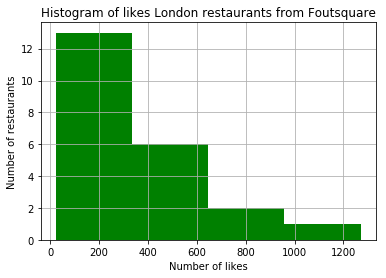

In [87]:
# visualize  total likes based on a histogram
import matplotlib.pyplot as plt
london_venues['likes'].hist(color='green', bins=4)
plt.title ('Histogram of likes London restaurants from Foutsquare')
plt.ylabel ('Number of restaurants')
plt.xlabel('Number of likes')
plt.show()

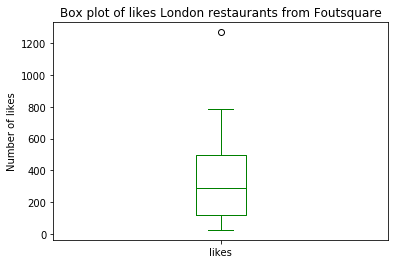

In [88]:
london_venues['likes'].plot(kind='box', color='green')
plt.title ('Box plot of likes London restaurants from Foutsquare')
plt.ylabel ('Number of likes')
plt.show()

In [89]:
# the bins we use
print(np.percentile(london_venues['likes'], 25))
print(np.percentile(london_venues['likes'], 50))
print(np.percentile(london_venues['likes'], 75))

120.75
286.5
496.25


In [90]:
# set them bin values to the appropriate values
# poor, below avg, abv avg, great

poor = london_venues['likes']<=np.percentile(london_venues['likes'], 25)
below_avg = london_venues[(london_venues['likes']>np.percentile(london_venues['likes'], 25)) & (london_venues['likes']<=np.percentile(london_venues['likes'], 50))]
abv_avg = london_venues[(london_venues['likes']>np.percentile(london_venues['likes'], 50)) & (london_venues['likes']<=np.percentile(london_venues['likes'], 75))]
great = london_venues['likes']>np.percentile(london_venues['likes'], 75)

In [91]:
# re-categorize restaurants based on likes
def conditions(s):
    if s['likes']<=np.percentile(london_venues['likes'], 25):
        return 'very low'
    if s['likes']<=np.percentile(london_venues['likes'], 50):
        return 'low'
    if s['likes']<=np.percentile(london_venues['likes'], 75):
        return 'middle'
    if s['likes']>np.percentile(london_venues['likes'], 75):
        return 'high'

london_venues['likes_cat']=london_venues.apply(conditions, axis=1)
london_venues

,name,id,categories,lat,lng,likes,likes_cat
4,Gordon's Wine Bar,4acdb591f964a520c7cc20e3,Wine Bar,51.507911,-0.123293,1270,high
5,Tandoor Chop House,583c344181907921f51d0740,North Indian Restaurant,51.509192,-0.125638,74,very low
8,Japan Centre,59b92a852955132234397fd2,Japanese Restaurant,51.509761,-0.131273,175,low
12,The Alchemist,5c010eae872f7d003823b8ed,Cocktail Bar,51.511458,-0.126955,38,very low
23,American Bar,4cd8409c2a805481fa279b2c,Cocktail Bar,51.510118,-0.119803,251,low
25,Bar Americain,502eac44e4b047efed0c6eb8,Cocktail Bar,51.510580,-0.135472,126,low
27,SUSHISAMBA,5b770349112c6c0039a9f0c2,Sushi Restaurant,51.512232,-0.122371,119,very low
29,Fabrique,560d0db9498e57efd528f261,Bakery,51.513520,-0.128575,134,low
52,Dukes Bar,4ac518c6f964a5200da520e3,Hotel Bar,51.505632,-0.139481,156,low
54,The Hop Locker,551e7d5e498e51f9cab94f6d,Beer Bar,51.505742,-0.115906,25,very low


In [92]:
# re-categorizing the categories
london_venues['categories'].unique()

array(['Wine Bar', 'North Indian Restaurant', 'Japanese Restaurant',
       'Cocktail Bar', 'Sushi Restaurant', 'Bakery', 'Hotel Bar',
       'Beer Bar', 'Steakhouse', 'Pizza Place', 'Restaurant',
       'Indian Restaurant', 'Ramen Restaurant', 'Pub', 'Bar'],
      dtype=object)

In [145]:
beer_pub = ['Beer Bar', 'Pub', 'Bar','Steakhouse']
cocktails_wine=['Wine Bar', 'Cocktail Bar', 'Hotel Bar']
indian_food=['North Indian Restaurant', 'Indian Restaurant']
asia_food=['Sushi Restaurant','Ramen Restaurant', 'Japanese Restaurant']
italian_food=['Pizza Place']
other = ['Bakery', 'Restaurant']

def conditions2(s):
    if s['categories'] in beer_pub:
        return 'beer pub'
    if s['categories'] in cocktails_wine:
        return 'cocktails wine'
    if s['categories'] in indian_food:
        return 'indian food'
    if s['categories'] in asia_food:
        return 'asia food'
    if s['categories'] in italian_food:
        return 'italian food'
    if s['categories'] in other:
        return 'other'

london_venues['categories_new']=london_venues.apply(conditions2, axis=1)
london_venues

,name,id,categories,lat,lng,likes,likes_cat,categories_new,label
4,Gordon's Wine Bar,4acdb591f964a520c7cc20e3,Wine Bar,51.507911,-0.123293,1270,high,cocktails wine,2
5,Tandoor Chop House,583c344181907921f51d0740,North Indian Restaurant,51.509192,-0.125638,74,very low,indian food,1
8,Japan Centre,59b92a852955132234397fd2,Japanese Restaurant,51.509761,-0.131273,175,low,asia food,1
12,The Alchemist,5c010eae872f7d003823b8ed,Cocktail Bar,51.511458,-0.126955,38,very low,cocktails wine,1
23,American Bar,4cd8409c2a805481fa279b2c,Cocktail Bar,51.510118,-0.119803,251,low,cocktails wine,3
25,Bar Americain,502eac44e4b047efed0c6eb8,Cocktail Bar,51.510580,-0.135472,126,low,cocktails wine,1
27,SUSHISAMBA,5b770349112c6c0039a9f0c2,Sushi Restaurant,51.512232,-0.122371,119,very low,asia food,1
29,Fabrique,560d0db9498e57efd528f261,Bakery,51.513520,-0.128575,134,low,other,1
52,Dukes Bar,4ac518c6f964a5200da520e3,Hotel Bar,51.505632,-0.139481,156,low,cocktails wine,1
54,The Hop Locker,551e7d5e498e51f9cab94f6d,Beer Bar,51.505742,-0.115906,25,very low,beer pub,1


In [146]:
#create variables for total likes and categories so we can cluster
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['categories_new', 'likes']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Name'] = london_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot

,Name,likes,asia food,beer pub,cocktails wine,indian food,italian food,other
4,Gordon's Wine Bar,1270,0,0,1,0,0,0
5,Tandoor Chop House,74,0,0,0,1,0,0
8,Japan Centre,175,1,0,0,0,0,0
12,The Alchemist,38,0,0,1,0,0,0
23,American Bar,251,0,0,1,0,0,0
25,Bar Americain,126,0,0,1,0,0,0
27,SUSHISAMBA,119,1,0,0,0,0,0
29,Fabrique,134,0,0,0,0,0,1
52,Dukes Bar,156,0,0,1,0,0,0
54,The Hop Locker,25,0,1,0,0,0,0


In [151]:
london_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 4 to 99
Data columns (total 8 columns):
Name              22 non-null object
likes             22 non-null int64
asia food         22 non-null uint8
beer pub          22 non-null uint8
cocktails wine    22 non-null uint8
indian food       22 non-null uint8
italian food      22 non-null uint8
other             22 non-null uint8
dtypes: int64(1), object(1), uint8(6)
memory usage: 660.0+ bytes


In [152]:
#run k-means clustering to get labels
cluster_df = london_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

In [153]:
# add clustering labels
 
london_venues['label'] = kmeans.labels_
london_venues

,name,id,categories,lat,lng,likes,likes_cat,categories_new,label
4,Gordon's Wine Bar,4acdb591f964a520c7cc20e3,Wine Bar,51.507911,-0.123293,1270,high,cocktails wine,2
5,Tandoor Chop House,583c344181907921f51d0740,North Indian Restaurant,51.509192,-0.125638,74,very low,indian food,1
8,Japan Centre,59b92a852955132234397fd2,Japanese Restaurant,51.509761,-0.131273,175,low,asia food,1
12,The Alchemist,5c010eae872f7d003823b8ed,Cocktail Bar,51.511458,-0.126955,38,very low,cocktails wine,1
23,American Bar,4cd8409c2a805481fa279b2c,Cocktail Bar,51.510118,-0.119803,251,low,cocktails wine,3
25,Bar Americain,502eac44e4b047efed0c6eb8,Cocktail Bar,51.510580,-0.135472,126,low,cocktails wine,1
27,SUSHISAMBA,5b770349112c6c0039a9f0c2,Sushi Restaurant,51.512232,-0.122371,119,very low,asia food,1
29,Fabrique,560d0db9498e57efd528f261,Bakery,51.513520,-0.128575,134,low,other,1
52,Dukes Bar,4ac518c6f964a5200da520e3,Hotel Bar,51.505632,-0.139481,156,low,cocktails wine,1
54,The Hop Locker,551e7d5e498e51f9cab94f6d,Beer Bar,51.505742,-0.115906,25,very low,beer pub,1


In [154]:
#visualize clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15,tiles='Stamen Toner')

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_venues['lat'], london_venues['lng'], london_venues['name'], london_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [155]:
#Examine Cluster 1
london_venues.loc[london_venues['label'] == 0, london_venues.columns[[0] +list(range(5, london_venues.shape[1]))]]

,name,likes,likes_cat,categories_new,label
60,Flat Iron,655,high,beer pub,0
71,Freud,599,high,cocktails wine,0
72,Pizza Pilgrims,508,high,italian food,0
73,The Delaunay,789,high,other,0
79,The Craft Beer Co.,620,high,beer pub,0


In [156]:
#Examine Cluster 2
london_venues.loc[london_venues['label'] == 1, london_venues.columns[[0] + list(range(5, london_venues.shape[1]))]]

,name,likes,likes_cat,categories_new,label
5,Tandoor Chop House,74,very low,indian food,1
8,Japan Centre,175,low,asia food,1
12,The Alchemist,38,very low,cocktails wine,1
25,Bar Americain,126,low,cocktails wine,1
27,SUSHISAMBA,119,very low,asia food,1
29,Fabrique,134,low,other,1
52,Dukes Bar,156,low,cocktails wine,1
54,The Hop Locker,25,very low,beer pub,1
92,GAIL's Bakery,30,very low,other,1
99,Terrace Bar,34,very low,beer pub,1


In [157]:
#Examine Cluster 3
london_venues.loc[london_venues['label'] == 2, london_venues.columns[[0] + list(range(5, london_venues.shape[1]))]]

,name,likes,likes_cat,categories_new,label
4,Gordon's Wine Bar,1270,high,cocktails wine,2


In [158]:
#Examine Cluster 4
london_venues.loc[london_venues['label'] == 3, london_venues.columns[[0] + list(range(5, london_venues.shape[1]))]]

,name,likes,likes_cat,categories_new,label
23,American Bar,251,low,cocktails wine,3
70,Cahoots,366,middle,cocktails wine,3
77,Punjab,332,middle,indian food,3
81,Kanada-Ya,461,middle,asia food,3
93,Gymkhana,397,middle,indian food,3
94,The Understudy,322,middle,beer pub,3
